# Magnetopause Standoff Distance Calculations

In [1]:
# Importing necessary libraries
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

varnames = ['Date', 'Bz', 'Pressure', 'Sunspots', 'DST'] #setting own varnames 

In [2]:
#Reading in data
def tconvert(x):
    # Extract year, month, day, hour from the datetime string
    year = int(x[:4])
    month = int(x[5:7])
    day = int(x[8:10])
    hour = int(x[11:13])
    # Create a datetime object with the extracted values
    return dt.datetime(year, month, day, hour)

#reading in data using genfromtxt and skipping unecessary rows
data = np.genfromtxt('OMNI2_H0_MRG1HR_3863995.csv', delimiter=',', names = varnames, converters={0: tconvert}, 
                          encoding='utf-8', skip_header=117, dtype = None)


In [3]:
# Replace zero values in 'Pressure' with a small non-zero value so that we don't divide by 0 (these will be masked later)
data['Pressure'] = np.where(data['Pressure'] == 0, 0.00001, data['Pressure'])

#Shue et al. formula
dist_E_radii = (10.22 + 1.29 * np.tanh(0.184 * (data['Bz'] + 8.14))) * (1. / data['Pressure']) ** (1. / 6.6)

#masked array where magnetopause standoff distance is masked for invalid Bz or Pressure values 
dist_E_radii = np.ma.masked_where((data['Bz'] == 999.9) | (data['Pressure'] == 99.99) | (data['Pressure'] == 0), 
                                  dist_E_radii)


Text(0, 0.5, 'Magnetopause Standoff Distance (Earth Radii)')

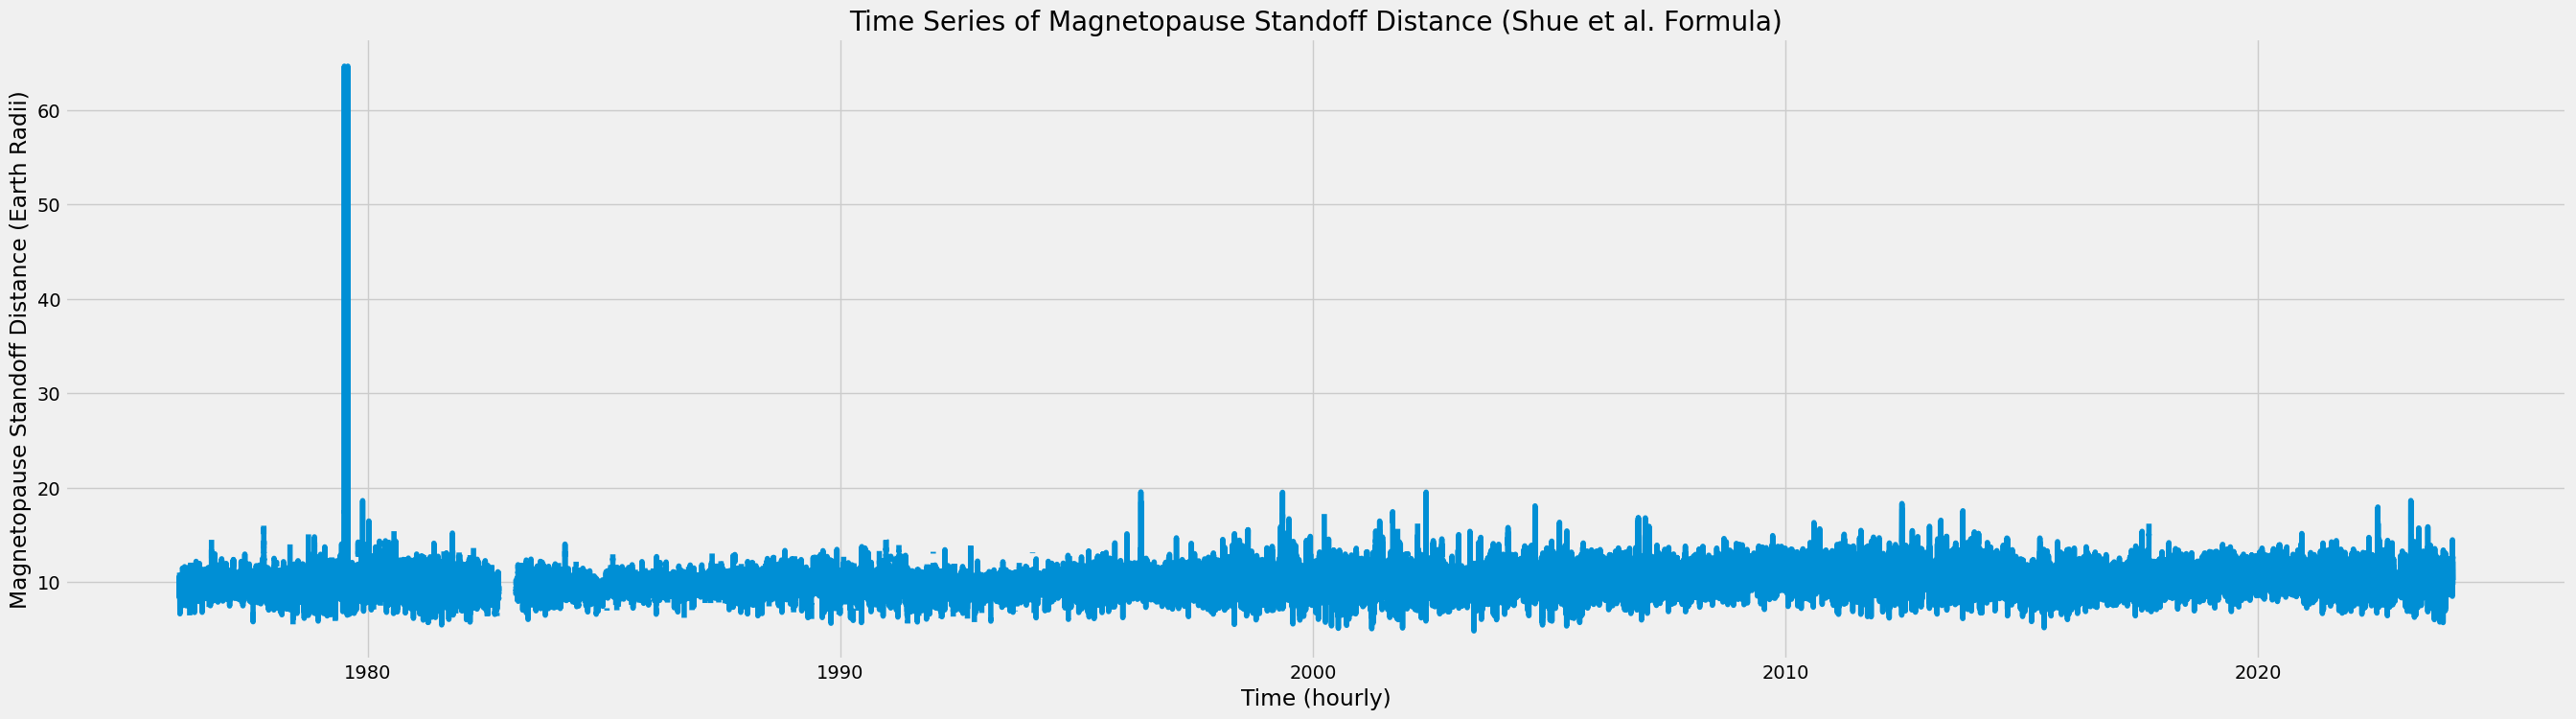

In [5]:
fig = plt.figure(figsize=(30, 8))

plt.plot(data['Date'], dist_E_radii )
plt.title("Time Series of Magnetopause Standoff Distance (Shue et al. Formula)")
plt.xlabel("Time (hourly)")
plt.ylabel("Magnetopause Standoff Distance (Earth Radii)")



In [6]:
max_index = np.argmax(dist_E_radii)
print("Index of the maximum value:", max_index)

Index of the maximum value: 30733


In [7]:
max = np.max(dist_E_radii)
print(max)

64.64405856761344


In [8]:
print(data[30733])

(datetime.datetime(1979, 7, 4, 13, 0), -1.6, 1.e-05, 310, -20)
